# Examining Features thats impacts Warfarin Does with Freature Importance
---
## CATALOG

### 1. Load Data
### 2. Machine Learning Methods
### 3. Feature Importance
### 4. Analyze Feature Importance
### 5. Feature Selection Report for INR Prediction (Neural Network)
### 6. Save Training Data for Neural Network

---
# 1. Load Data
---

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/cleaned_data.csv')
df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,VKORC1 -1639 consensus_G/G,Gender_male,Age_20 - 29,Age_30 - 39,Age_40 - 49,Age_50 - 59,Age_60 - 69,Age_70 - 79,Age_80 - 89,Age_90+
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False
1473,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
1474,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,False,False,False,False
1475,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Height (cm)                                   1477 non-null   float64
 1   Weight (kg)                                   1477 non-null   float64
 2   INR on Reported Therapeutic Dose of Warfarin  1477 non-null   float64
 3   Current Smoker                                1477 non-null   float64
 4   Diabetes                                      1477 non-null   float64
 5   Amiodarone (Cordarone)                        1477 non-null   float64
 6   Phenytoin (Dilantin)                          1477 non-null   float64
 7   Rifampin or Rifampicin                        1477 non-null   float64
 8   Sulfonamide Antibiotics                       1477 non-null   float64
 9   Anti-fungal Azoles                            1477 non-null   f

---
# 2. Machine Learning Methods
---

In [4]:
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from typing import Dict

# Tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [5]:
RANDOM_STATE: int = 42

MODELS: Dict = {
    'GB': ('GradientBoosting', GradientBoostingRegressor(random_state=RANDOM_STATE)),
    'RF': ('RandomForest', RandomForestRegressor(random_state=RANDOM_STATE)),
    'DT': ('DecisionTree', DecisionTreeRegressor(random_state=RANDOM_STATE)),
    'ET': ('ExtraTrees', ExtraTreesRegressor(random_state=RANDOM_STATE)),
    'XGB': ('XGBoosting', XGBRegressor(random_state=RANDOM_STATE)),
}

In [6]:
def eval_model(y_test:pd.DataFrame, y_pred:pd.DataFrame):
    print("Model Performance".center(100, '-'))
    print("R² score:", r2_score(y_test, y_pred))
    print("RMSE:", root_mean_squared_error(y_test, y_pred))

In [7]:
def importance(model, X:pd.DataFrame, impt_dict=None, idx_name=None):
    importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

    importance.sort_values(by='Importance', ascending=False, inplace=True)

    print("Feature Importances".center(100, '-'))
    print(f"{'Feature':<80} {'Importance':>15}")
    for i, row in importance.iterrows():
        print(f"{i:<80} {row['Importance']:>15.6f}")
    
    if impt_dict != None:
        if idx_name != None:
            impt_dict.setdefault('Model', [])
            impt_dict['Model'].append(idx_name)
        else:
            impt_dict.setdefault('Model', [])
            impt_dict['Model'].append(len(impt_dict['Model']) + 1)

        for i in importance.index:
            impt_dict.setdefault(i, [])
            impt_dict[i].append(importance.loc[i, 'Importance'])
        
        return impt_dict

In [8]:
def predict(X_train:pd.DataFrame, y_train:pd.DataFrame, X_test:pd.DataFrame, y_test:pd.DataFrame, importance_dict:Dict, model_use:str=['GB', 'RF', 'ET', 'DT', 'XGB'],):
    model_name, model = MODELS[model_use][0], MODELS[model_use][1]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    eval_model(y_test, y_pred)

    importance_dict = importance(
        model=model, 
        X=X_train, 
        impt_dict=importance_dict, 
        idx_name=model_name
    )

    return importance_dict

---
# 3. Feature Importance
---

In [9]:
importance_dict = {}

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    # df.drop(columns=['INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin', 'Subject Reached Stable Dose of Warfarin', 'Other']),
    df.drop(columns=['INR on Reported Therapeutic Dose of Warfarin']),
    df['INR on Reported Therapeutic Dose of Warfarin'],
    test_size=0.2,
    train_size=0.8,
    random_state=42,
)

### 1. Decision Tree Regressor

In [11]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='DT'
)

-----------------------------------------Model Performance------------------------------------------
R² score: -1.0733723374202069
RMSE: 0.44065024127434127
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.253849
Height (cm)                                                                             0.251069
Therapeutic Dose of Warfarin                                                            0.229858
Age_70 - 79                                                                             0.032355
VKORC1 -1639 consensus_A/G                                                              0.024826
Diabetes                                                                                0.023241
Age_60 - 69                                                    

### 2. Random Forest Regressor

In [12]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='RF',
)

-----------------------------------------Model Performance------------------------------------------
R² score: 0.02220515421385294
RMSE: 0.30260718399280284
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.251354
Therapeutic Dose of Warfarin                                                            0.224376
Height (cm)                                                                             0.216556
Age_60 - 69                                                                             0.025865
VKORC1 -1639 consensus_A/G                                                              0.025520
VKORC1 -1639 consensus_G/G                                                              0.025192
Age_70 - 79                                                    

### 3. Extra Trees Regressor

In [13]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='ET',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.05068833317611854
RMSE: 0.3136839638161401
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Therapeutic Dose of Warfarin                                                            0.194540
Height (cm)                                                                             0.192653
Weight (kg)                                                                             0.191006
Gender_male                                                                             0.041301
Age_70 - 79                                                                             0.033798
Diabetes                                                                                0.032612
Current Smoker                                                 

### 4. XGBoost Regressor

In [14]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='XGB',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.18486234315108918
RMSE: 0.3331112581926388
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Age_70 - 79                                                                             0.085104
Anti-fungal Azoles                                                                      0.072739
CYP2C9 consensus_*2/*3                                                                  0.068357
Age_20 - 29                                                                             0.066698
CYP2C9 consensus_*2/*2                                                                  0.060755
VKORC1 -1639 consensus_A/G                                                              0.057675
VKORC1 -1639 consensus_G/G                                     

### 5. Gradient Boosting Regressor

In [15]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_use='GB',
)

-----------------------------------------Model Performance------------------------------------------
R² score: 0.020286535823735852
RMSE: 0.30290392475803174
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.236734
Therapeutic Dose of Warfarin                                                            0.221820
Height (cm)                                                                             0.182960
VKORC1 -1639 consensus_A/G                                                              0.074020
VKORC1 -1639 consensus_G/G                                                              0.048876
Age_70 - 79                                                                             0.047713
Age_20 - 29                                                   

---
# 4. Analyze Feature Importance
---

In [16]:
importance_df = pd.DataFrame(importance_dict)
importance_df.set_index('Model', inplace=True)
importance_df = importance_df.T
importance_df.index.name = 'Feature'
importance_df

Model,DecisionTree,RandomForest,ExtraTrees,XGBoosting,GradientBoosting
Feature,,,,,
Weight (kg),0.253849,0.251354,0.191006,0.037362,0.236734
Height (cm),0.251069,0.216556,0.192653,0.028255,0.182960
Therapeutic Dose of Warfarin,0.229858,0.224376,0.194540,0.044097,0.221820
Age_70 - 79,0.032355,0.024414,0.033798,0.085104,0.047713
VKORC1 -1639 consensus_A/G,0.024826,0.025520,0.024826,0.057675,0.074020
Diabetes,0.023241,0.022678,0.032612,0.028208,0.008557
Age_60 - 69,0.021139,0.025865,0.027501,0.033110,0.008310
CYP2C9 consensus_*1/*2,0.019001,0.018670,0.030610,0.042118,0.012680
Current Smoker,0.018843,0.019637,0.031923,0.028836,0.007093


In [17]:
importance_df.to_csv('./datasets/feature_importance.csv', index=True)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def plot_importance(importance:pd.DataFrame, plot_type:str=['bar', 'box', 'heat', 'top'], figsize:tuple=(17, 10), top_n:int=15, font_size:float=15.0):
    importance["MeanImportance"] = importance.mean(axis=1)
    df_sorted = importance.sort_values("MeanImportance", ascending=False).drop("MeanImportance", axis=1)
    df_top = df_sorted.head(top_n)

    plt.figure(figsize=figsize)
    match plot_type:
        # Stacked Bar Plot – Compare Importance Across Models
        case 'bar':
            ax = df_top.T.plot(
                kind="bar",
                stacked=True,
                figsize=figsize,
                colormap="tab20"
            )

            plt.title("Stacked Feature Importances Across Models (Top 15 Features)", fontsize=font_size)
            plt.ylabel("Importance Score", fontsize=font_size)
            plt.xlabel("Model", fontsize=font_size)
            plt.xticks(rotation=0)
            plt.legend(title="Feature", bbox_to_anchor=(1.02, 1), loc="upper left")
            plt.tight_layout(rect=[0, 0, 0.85, 1])
            plt.show()
        
        # Box Plot – Importance Distribution Across Models
        case 'box':
            df_melted = df_top.reset_index().melt(id_vars="Feature", var_name="Model", value_name="Importance")
            sns.boxplot(data=df_melted, x="Importance", y="Feature", orient="h", palette="Set3")
            plt.title("Distribution of Feature Importance Across Models", fontsize=font_size)
            plt.tight_layout()
            plt.show()
        
        # Heatmap – Visual Comparison Across Models
        case 'heat':
            sns.heatmap(df_top.T, annot=True, cmap="viridis", fmt=".3f", cbar_kws={'label': 'Importance'})
            plt.title("Heatmap of Feature Importances (Top 15 Features)", fontsize=font_size)
            plt.xticks(rotation=90)
            plt.yticks(rotation=0)
            plt.xlabel("Feature", fontsize=font_size)
            plt.ylabel("Model", fontsize=font_size)
            plt.tight_layout()
            plt.show()

## Stacked Bar Plot – Compare Importance Across Models

<Figure size 1700x1000 with 0 Axes>

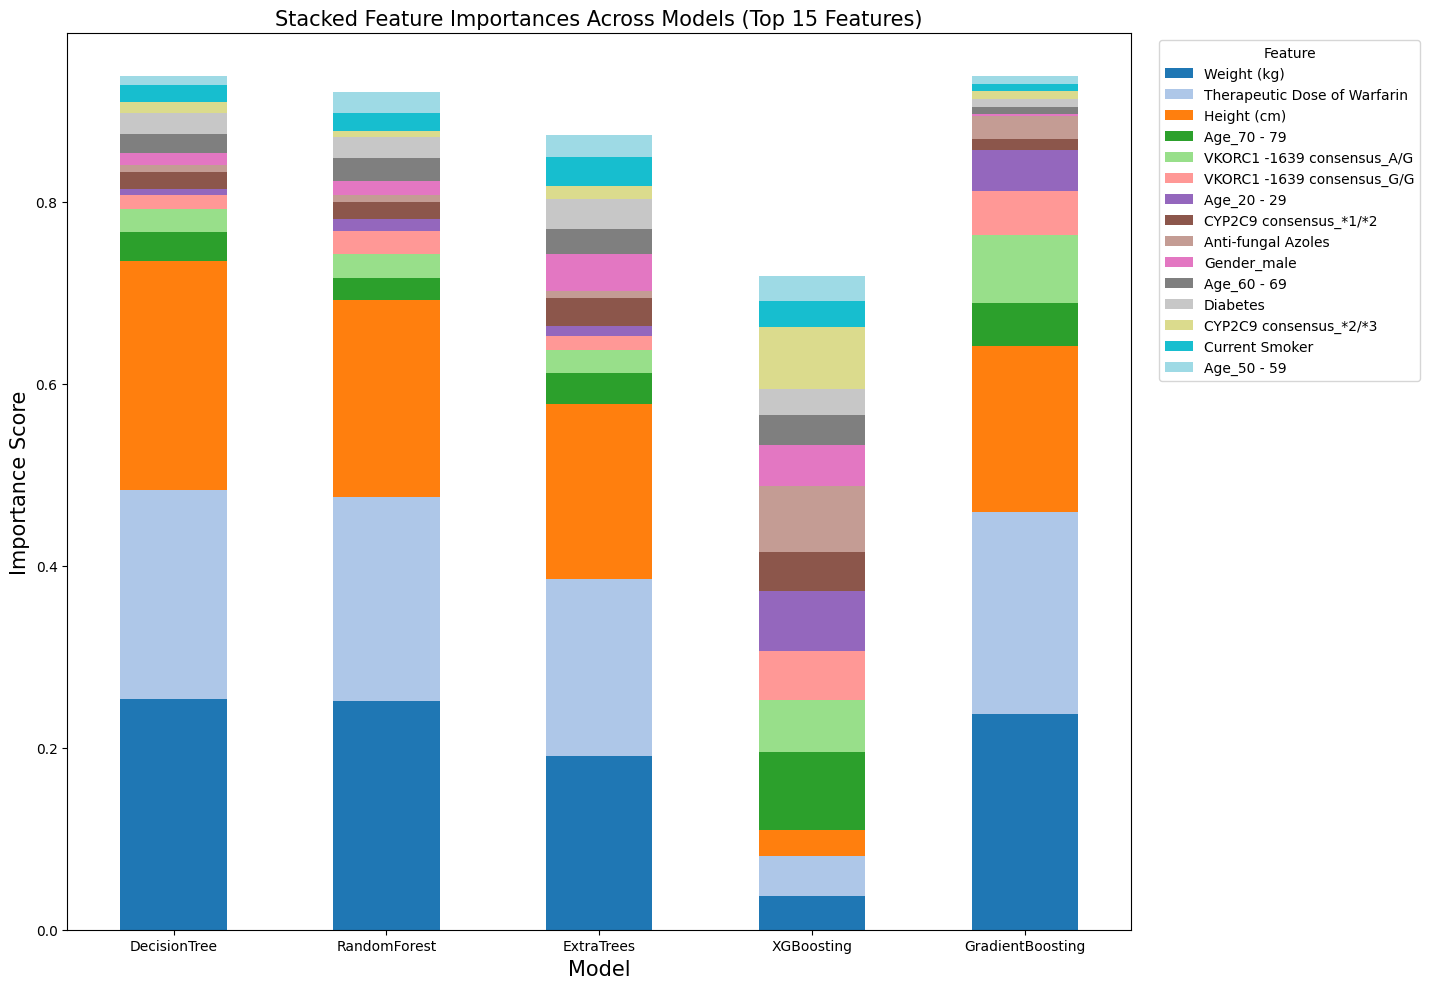

In [20]:
plot_importance(
    importance=importance_df,
    plot_type='bar'
)

## Box Plot – Importance Distribution Across Models

/var/folders/r8/b8mr888s5wzdjlhk9_q3q77w0000gn/T/ipykernel_42543/1673889725.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Importance", y="Feature", orient="h", palette="Set3")


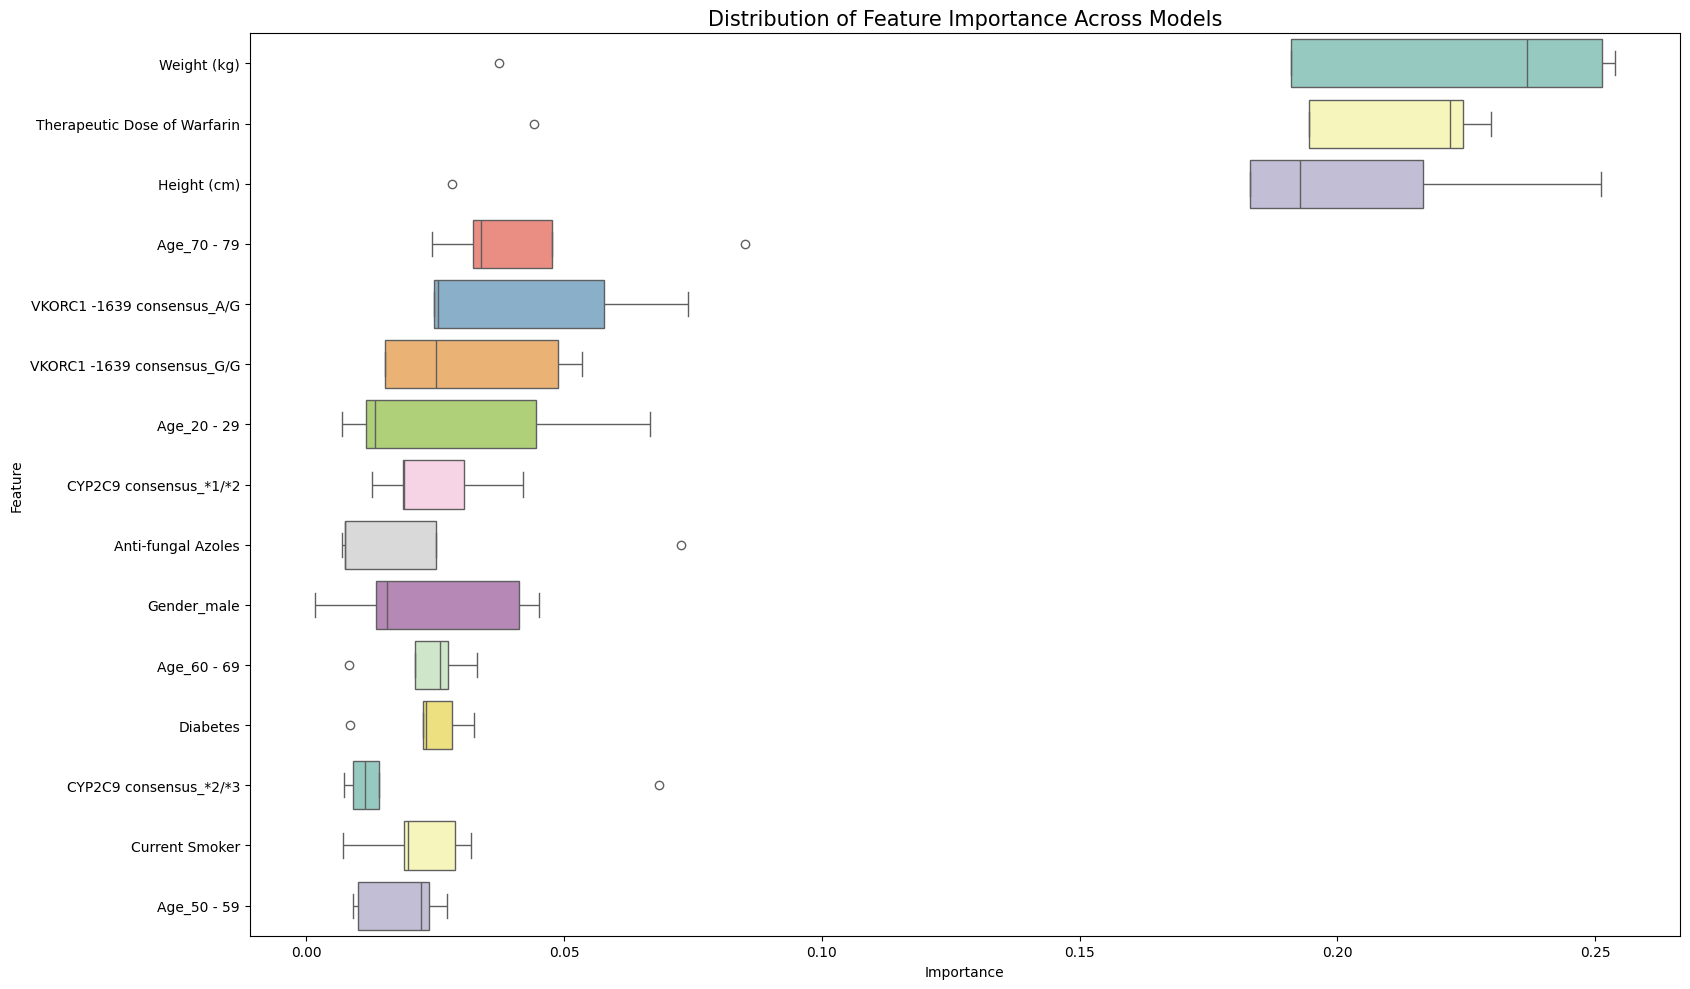

In [21]:
plot_importance(
    importance=importance_df,
    plot_type='box'
)

## Heatmap – Visual Comparison Across Models

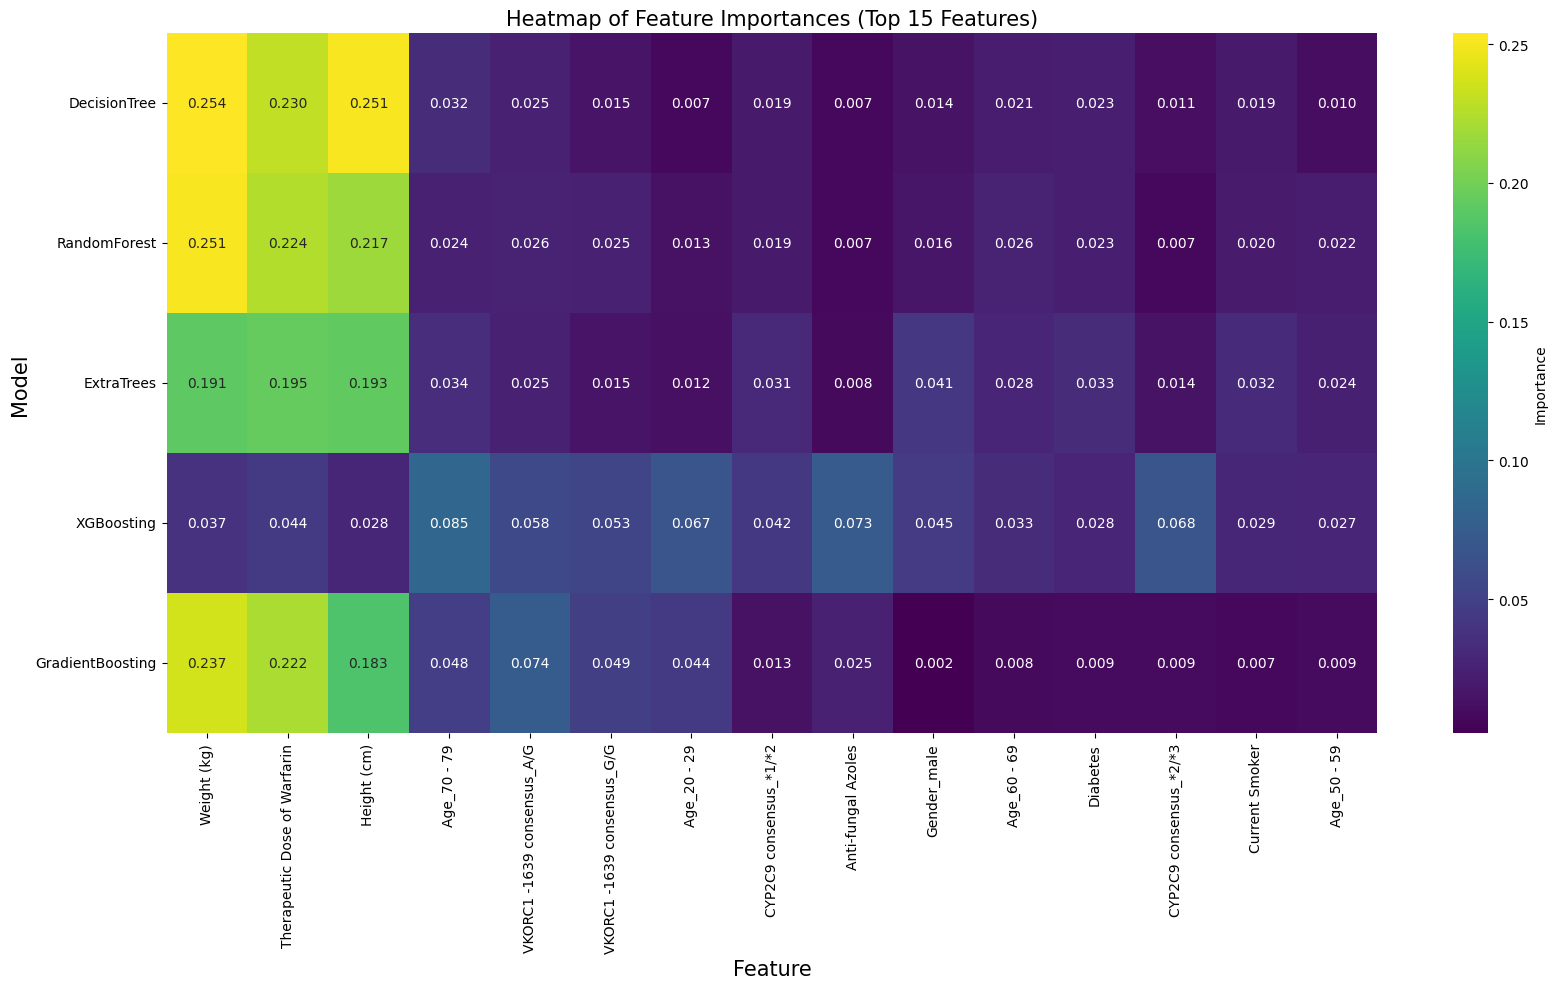

In [22]:
plot_importance(
    importance=importance_df,
    plot_type='heat'
)

---
# 5. Feature Selection Report for INR Prediction (Neural Network)
---

In [23]:
df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,VKORC1 -1639 consensus_G/G,Gender_male,Age_20 - 29,Age_30 - 39,Age_40 - 49,Age_50 - 59,Age_60 - 69,Age_70 - 79,Age_80 - 89,Age_90+
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False
1473,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,True,False,False
1474,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,False,False,False,False
1475,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,False,False


In [24]:
importance_df

Model,DecisionTree,RandomForest,ExtraTrees,XGBoosting,GradientBoosting,MeanImportance
Feature,,,,,,
Weight (kg),0.253849,0.251354,0.191006,0.037362,0.236734,0.194061
Height (cm),0.251069,0.216556,0.192653,0.028255,0.182960,0.174299
Therapeutic Dose of Warfarin,0.229858,0.224376,0.194540,0.044097,0.221820,0.182938
Age_70 - 79,0.032355,0.024414,0.033798,0.085104,0.047713,0.044677
VKORC1 -1639 consensus_A/G,0.024826,0.025520,0.024826,0.057675,0.074020,0.041373
Diabetes,0.023241,0.022678,0.032612,0.028208,0.008557,0.023059
Age_60 - 69,0.021139,0.025865,0.027501,0.033110,0.008310,0.023185
CYP2C9 consensus_*1/*2,0.019001,0.018670,0.030610,0.042118,0.012680,0.024616
Current Smoker,0.018843,0.019637,0.031923,0.028836,0.007093,0.021266


In [25]:
age_mapping = {
    "Age_20 - 29": 24.5,
    "Age_30 - 39": 34.5,
    "Age_40 - 49": 44.5,
    "Age_50 - 59": 54.5,
    "Age_60 - 69": 64.5,
    "Age_70 - 79": 74.5,
    "Age_80 - 89": 84.5,
    "Age_90+": 95
}

df["Age"] = 0
for col, midpoint in age_mapping.items():
    if col in df.columns:
        df["Age"] += df[col] * midpoint
        if col in df.columns:
            df.drop(columns=col, inplace=True)

df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,CYP2C9 consensus_*1/*2,CYP2C9 consensus_*1/*3,CYP2C9 consensus_*1/*5,CYP2C9 consensus_*2/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*3/*3,VKORC1 -1639 consensus_A/G,VKORC1 -1639 consensus_G/G,Gender_male,Age
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,84.5
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,True,84.5
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,74.5
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,74.5
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,64.5
1473,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,74.5
1474,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,True,True,54.5
1475,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,74.5


In [26]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)
df

,Height (cm),Weight (kg),INR on Reported Therapeutic Dose of Warfarin,Current Smoker,Diabetes,Amiodarone (Cordarone),Phenytoin (Dilantin),Rifampin or Rifampicin,Sulfonamide Antibiotics,Anti-fungal Azoles,...,CYP2C9 consensus_*1/*2,CYP2C9 consensus_*1/*3,CYP2C9 consensus_*1/*5,CYP2C9 consensus_*2/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*3/*3,VKORC1 -1639 consensus_A/G,VKORC1 -1639 consensus_G/G,Gender_male,Age
0,173.482,75.50,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,84.5
1,166.116,70.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,84.5
2,176.022,88.60,1.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,74.5
3,176.022,92.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,74.5
4,178.562,114.00,2.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,180.340,77.27,2.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,64.5
1473,180.340,84.55,2.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,74.5
1474,185.420,90.91,2.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,54.5
1475,157.480,86.36,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,74.5


In [27]:
drop_cols = [
    "Therapeutic Dose of Warfarin",
    "Age_20 - 29",
    "Age_30 - 39",
    "Age_40 - 49",
    "Age_50 - 59",
    "Age_60 - 69",
    "Age_70 - 79",
    "Age_80 - 89",
    "Age_90+",
    'Weight (kg)',
    'Height (cm)',
    'Gender_male',
]

importance_df["mean_importance"] = importance_df.mean(axis=1)
top_features = (
    importance_df.drop(index=drop_cols, errors="ignore")
    .sort_values("mean_importance", ascending=False)
    .head(15)
    .index.tolist()
)

top_features

['VKORC1 -1639 consensus_A/G',
 'VKORC1 -1639 consensus_G/G',
 'CYP2C9 consensus_*1/*2',
 'Anti-fungal Azoles',
 'Diabetes',
 'CYP2C9 consensus_*2/*3',
 'Current Smoker',
 'CYP2C9 consensus_*2/*2',
 'CYP2C9 consensus_*1/*3',
 'Amiodarone (Cordarone)',
 'CYP2C9 consensus_*1/*14',
 'Phenytoin (Dilantin)',
 'Sulfonamide Antibiotics',
 'CYP2C9 consensus_*3/*3',
 'CYP2C9 consensus_*1/*5']

In [28]:
selected_features = [
    # Target variable
    "INR on Reported Therapeutic Dose of Warfarin",
    "Therapeutic Dose of Warfarin",
    
    # Core features
    "Weight (kg)",
    "Height (cm)",
    "Gender_male",
    "Age",

    # Additional predictive features
    'VKORC1 -1639 consensus_A/G',
    'VKORC1 -1639 consensus_G/G',
    'CYP2C9 consensus_*1/*14',
    'CYP2C9 consensus_*1/*2',
    'CYP2C9 consensus_*1/*3',
    'CYP2C9 consensus_*1/*5',
    'CYP2C9 consensus_*2/*2',
    'CYP2C9 consensus_*2/*3',
    'CYP2C9 consensus_*3/*3',
    'Sulfonamide Antibiotics',
    'Amiodarone (Cordarone)',
    'Phenytoin (Dilantin)',
    'Anti-fungal Azoles',
    'Current Smoker',
    'Diabetes',
]

In [29]:
df = df[selected_features]
df

,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin,Weight (kg),Height (cm),Gender_male,Age,VKORC1 -1639 consensus_A/G,VKORC1 -1639 consensus_G/G,CYP2C9 consensus_*1/*14,CYP2C9 consensus_*1/*2,...,CYP2C9 consensus_*1/*5,CYP2C9 consensus_*2/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*3/*3,Sulfonamide Antibiotics,Amiodarone (Cordarone),Phenytoin (Dilantin),Anti-fungal Azoles,Current Smoker,Diabetes
0,2.13,35.000000,75.50,173.482,1,84.5,1,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.33,17.500000,70.00,166.116,1,84.5,1,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.90,20.000000,88.60,176.022,1,74.5,1,0,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.83,30.000000,92.00,176.022,1,74.5,1,0,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.33,42.000000,114.00,178.562,1,54.5,1,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2.30,39.974286,77.27,180.340,1,64.5,1,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1473,2.30,28.000000,84.55,180.340,1,74.5,1,0,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1474,2.90,49.980000,90.91,185.420,1,54.5,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1475,2.50,42.490000,86.36,157.480,0,74.5,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


---
# 6. Feature Engineering
--- 

In [30]:
# Drop low-variance binary features (mostly 0s)
low_variance = df.columns[(df.nunique() <= 2) & (df.std() < 0.05)]
df.drop(columns=low_variance, inplace=True)

/var/folders/r8/b8mr888s5wzdjlhk9_q3q77w0000gn/T/ipykernel_42543/914479442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=low_variance, inplace=True)


In [31]:
# Create BMI feature
df["BMI"] = df.loc[:, "Weight (kg)"]/((df.loc[:, "Height (cm)"]/100)**2)

/var/folders/r8/b8mr888s5wzdjlhk9_q3q77w0000gn/T/ipykernel_42543/11383815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BMI"] = df.loc[:, "Weight (kg)"]/((df.loc[:, "Height (cm)"]/100)**2)


---
# 7. Save Training Data for Neural Network
--- 

In [32]:
df

,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin,Weight (kg),Height (cm),Gender_male,Age,VKORC1 -1639 consensus_A/G,VKORC1 -1639 consensus_G/G,CYP2C9 consensus_*1/*2,CYP2C9 consensus_*1/*3,...,CYP2C9 consensus_*2/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*3/*3,Sulfonamide Antibiotics,Amiodarone (Cordarone),Phenytoin (Dilantin),Anti-fungal Azoles,Current Smoker,Diabetes,BMI
0,2.13,35.000000,75.50,173.482,1,84.5,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,25.086387
1,2.33,17.500000,70.00,166.116,1,84.5,1,0,0,1,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,25.367351
2,1.90,20.000000,88.60,176.022,1,74.5,1,0,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,28.595640
3,2.83,30.000000,92.00,176.022,1,74.5,1,0,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,29.692990
4,2.33,42.000000,114.00,178.562,1,54.5,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,35.754176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2.30,39.974286,77.27,180.340,1,64.5,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,23.758925
1473,2.30,28.000000,84.55,180.340,1,74.5,1,0,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.997374
1474,2.90,49.980000,90.91,185.420,1,54.5,0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,26.442256
1475,2.50,42.490000,86.36,157.480,0,74.5,0,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,34.822650


In [ ]:
df.to_csv('datasets/NN_Training_Data.csv', index=False)